In [675]:
import pandas as pd
import csv as csv
import numpy as np
import matplotlib.pyplot as plt
import itertools
import scipy 
import scipy.stats as stats
from scipy.optimize import curve_fit


In [676]:
df = pd.read_csv('data.csv')
df


,Timestamp,"[to enter raffle, optional] what is your kerb?",what country are you from?,prior,number,RFK Jr. Claims ‘Vaccine Research’ Likely Responsible for HIV and the Spanish Flu,RFK Jr. Claims ‘Vaccine Research’ Likely Responsible for HIV and the Spanish Flu.1,"A viral video appears to show a white woman trying to take a bike from a young Black man, sparking outrage over racism and 'weaponized' tears","A viral video appears to show a white woman trying to take a bike from a young Black man, sparking outrage over racism and 'weaponized' tears.1",Hunter Biden accused of lavish personal spending and avoiding taxes,...,EPA partners with Shell to set precedent for industry-wide green policies,EPA partners with Shell to set precedent for industry-wide green policies.1,AOC demands Biden 'reverse course' on border wall construction amid migrant surge: 'Cruel policy',AOC demands Biden 'reverse course' on border wall construction amid migrant surge: 'Cruel policy'.1,Texas Supreme Court temporarily blocks ruling that allowed woman emergency abortion,Texas Supreme Court temporarily blocks ruling that allowed woman emergency abortion.1,Federal appeals court delivers big blow to New York's expansive and illegal concealed carry gun law,Federal appeals court delivers big blow to New York's expansive and illegal concealed carry gun law.1,5G radiation accelerates spread of COVID-19,5G radiation accelerates spread of COVID-19.1
0,12/9/2023 14:15:10,arahul,United States,centrist,1,3.0,NaN,NaN,NaN,5.0,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/9/2023 14:58:13,zef,France,very liberal,1,2.0,NaN,NaN,NaN,4.0,...,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2,12/9/2023 18:09:58,adyce25,USA,moderate liberal,1,1.0,NaN,5.0,NaN,1.0,...,5.0,NaN,5.0,NaN,5.0,NaN,1.0,NaN,1.0,NaN
3,12/9/2023 18:10:00,meganeat@mit.edu,United States,centrist,2,NaN,2.0,NaN,3.0,NaN,...,NaN,2.0,NaN,5.0,NaN,2.0,NaN,3.0,NaN,1.0
4,12/9/2023 18:10:11,alsbrown,USA,very liberal,2,NaN,2.0,NaN,4.0,NaN,...,NaN,3.0,NaN,4.0,NaN,5.0,NaN,4.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,12/11/2023 16:39:59,NaN,United States,moderate liberal,2,NaN,4.0,NaN,4.0,NaN,...,NaN,2.0,NaN,4.0,NaN,3.0,NaN,4.0,NaN,2.0
142,12/12/2023 9:40:08,emmaf,usa,moderate liberal,1,4.0,NaN,3.0,NaN,4.0,...,4.0,NaN,4.0,NaN,2.0,NaN,3.0,NaN,1.0,NaN
143,12/12/2023 15:23:57,spei,US,moderate conservative,1,2.0,NaN,3.0,NaN,4.0,...,4.0,NaN,3.0,NaN,4.0,NaN,3.0,NaN,2.0,NaN
144,12/14/2023 5:29:14,NaN,murica,centrist,1,2.0,NaN,3.0,NaN,4.0,...,4.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,5.0,NaN


In [677]:
df = df.drop(columns=['Timestamp', '[to enter raffle, optional] what is your kerb?','what country are you from?'], axis=1)
df = df.drop([0,1], axis=0)
prior_map = {'very liberal': 0.1, 
         'moderate liberal': 0.3, 
         'centrist': 0.5,
         'moderate conservative': 0.7,
         'very conservative': 0.9
         }
questions = {
    'RFK': "RFK Jr. Claims ‘Vaccine Research’ Likely Responsible for HIV and the Spanish Flu",
    'Biden': "Hunter Biden accused of lavish personal spending and avoiding taxes",
    'Florida': "Breaking: Florida Man Shoots White Teenager before Running into Woods",
    'AA': "Right-wing activists claim that affirmative action being discriminatory against Asian Americans is a myth",
    'Johnson': "Republican Speaker Johnson wrote foreword for book filled with conspiracy theories and homophobic insults",
    'AOC': "AOC demands Biden 'reverse course' on border wall construction amid migrant surge: 'Cruel policy'",
    'Gun': "Federal appeals court delivers big blow to New York's expansive and illegal concealed carry gun law",
    'Karen': "A viral video appears to show a white woman trying to take a bike from a young Black man, sparking outrage over racism and 'weaponized' tears",
    'Dixie': "Former 3rd Circuit Democratic State Attorney And Former Dixie County Attorney Sentenced To More Than Three Years In Prison For Extortion And Other Crimes",
    'Deportations': "Deportations lower under Trump administration than Obama",
    'Veg': "GOP lawmaker condemns global body’s push to turn America vegetarian",
    'EPA': "EPA partners with Shell to set precedent for industry-wide green policies",
    'Abortion': "Texas Supreme Court temporarily blocks ruling that allowed woman emergency abortion",
    'COVID': "5G radiation accelerates spread of COVID-19",
}

df['prior'] = df['prior'].map(prior_map)
df

,prior,number,RFK Jr. Claims ‘Vaccine Research’ Likely Responsible for HIV and the Spanish Flu,RFK Jr. Claims ‘Vaccine Research’ Likely Responsible for HIV and the Spanish Flu.1,"A viral video appears to show a white woman trying to take a bike from a young Black man, sparking outrage over racism and 'weaponized' tears","A viral video appears to show a white woman trying to take a bike from a young Black man, sparking outrage over racism and 'weaponized' tears.1",Hunter Biden accused of lavish personal spending and avoiding taxes,Hunter Biden accused of lavish personal spending and avoiding taxes.1,Former 3rd Circuit Democratic State Attorney And Former Dixie County Attorney Sentenced To More Than Three Years In Prison For Extortion And Other Crimes,Former 3rd Circuit Democratic State Attorney And Former Dixie County Attorney Sentenced To More Than Three Years In Prison For Extortion And Other Crimes.1,...,EPA partners with Shell to set precedent for industry-wide green policies,EPA partners with Shell to set precedent for industry-wide green policies.1,AOC demands Biden 'reverse course' on border wall construction amid migrant surge: 'Cruel policy',AOC demands Biden 'reverse course' on border wall construction amid migrant surge: 'Cruel policy'.1,Texas Supreme Court temporarily blocks ruling that allowed woman emergency abortion,Texas Supreme Court temporarily blocks ruling that allowed woman emergency abortion.1,Federal appeals court delivers big blow to New York's expansive and illegal concealed carry gun law,Federal appeals court delivers big blow to New York's expansive and illegal concealed carry gun law.1,5G radiation accelerates spread of COVID-19,5G radiation accelerates spread of COVID-19.1
2,0.3,1,1.0,NaN,5.0,NaN,1.0,NaN,5.0,NaN,...,5.0,NaN,5.0,NaN,5.0,NaN,1.0,NaN,1.0,NaN
3,0.5,2,NaN,2.0,NaN,3.0,NaN,3.0,NaN,5.0,...,NaN,2.0,NaN,5.0,NaN,2.0,NaN,3.0,NaN,1.0
4,0.1,2,NaN,2.0,NaN,4.0,NaN,4.0,NaN,5.0,...,NaN,3.0,NaN,4.0,NaN,5.0,NaN,4.0,NaN,2.0
5,0.3,1,3.0,NaN,3.0,NaN,3.0,NaN,4.0,NaN,...,3.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
6,0.3,2,NaN,1.0,NaN,5.0,NaN,1.0,NaN,4.0,...,NaN,5.0,NaN,3.0,NaN,5.0,NaN,3.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.3,2,NaN,4.0,NaN,4.0,NaN,4.0,NaN,4.0,...,NaN,2.0,NaN,4.0,NaN,3.0,NaN,4.0,NaN,2.0
142,0.3,1,4.0,NaN,3.0,NaN,4.0,NaN,4.0,NaN,...,4.0,NaN,4.0,NaN,2.0,NaN,3.0,NaN,1.0,NaN
143,0.7,1,2.0,NaN,3.0,NaN,4.0,NaN,2.0,NaN,...,4.0,NaN,3.0,NaN,4.0,NaN,3.0,NaN,2.0,NaN
144,0.5,1,2.0,NaN,3.0,NaN,4.0,NaN,3.0,NaN,...,4.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,5.0,NaN


In [678]:
for column in df:
    if column in ['prior', 'number', 'prior_rating']:
        continue
    if column.endswith('.1'):
        df = df.drop(columns=[column], axis=1)
        continue  
    df[column] = df[column].combine_first(df[column+'.1'])
    df[column] = (df[column]-1)*0.25
df = df.rename(columns={v: k for k, v in questions.items()})
df

,prior,number,RFK,Karen,Biden,Dixie,Florida,Deportations,AA,Veg,Johnson,EPA,AOC,Abortion,Gun,COVID
2,0.3,1,0.00,1.00,0.00,1.00,1.00,0.50,0.75,0.00,0.25,1.00,1.00,1.00,0.00,0.00
3,0.5,2,0.25,0.50,0.50,1.00,0.75,0.50,0.50,0.50,0.25,0.25,1.00,0.25,0.50,0.00
4,0.1,2,0.25,0.75,0.75,1.00,1.00,0.75,0.50,0.25,0.75,0.50,0.75,1.00,0.75,0.25
5,0.3,1,0.50,0.50,0.50,0.75,0.75,0.00,0.25,0.50,0.25,0.50,0.25,0.25,0.25,0.25
6,0.3,2,0.00,1.00,0.00,0.75,1.00,0.25,0.75,0.25,0.25,1.00,0.50,1.00,0.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.3,2,0.75,0.75,0.75,0.75,0.50,0.25,0.75,0.75,0.75,0.25,0.75,0.50,0.75,0.25
142,0.3,1,0.75,0.50,0.75,0.75,0.75,0.25,0.25,0.75,0.75,0.75,0.75,0.25,0.50,0.00
143,0.7,1,0.25,0.50,0.75,0.25,0.75,0.50,0.25,0.25,0.50,0.75,0.50,0.75,0.50,0.25
144,0.5,1,0.25,0.50,0.75,0.50,0.75,0.75,0.75,0.50,0.50,0.75,0.75,0.75,0.75,1.00


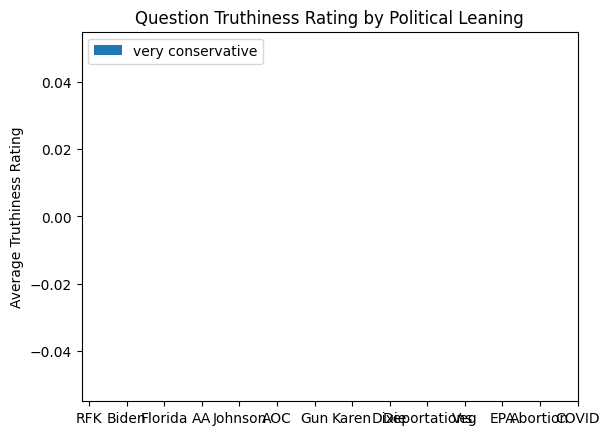

In [679]:
fig, ax = plt.subplots()

offset = width * multiplier
rects = ax.bar(x + offset, 
                [mean_vals[j][i] for j in range(q)], 
                width, 
                label=list(prior_map.keys())[i], 
                yerr=[err_vals[j][i] for j in range(q)],
                capsize=3)
ax.bar_label(rects, padding=5)
multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Truthiness Rating')
ax.set_title('Question Truthiness Rating by Political Leaning')
ax.set_xticks(x + width, list(questions.keys()))
ax.legend(loc='upper left', ncols=5)
ax.yaxis

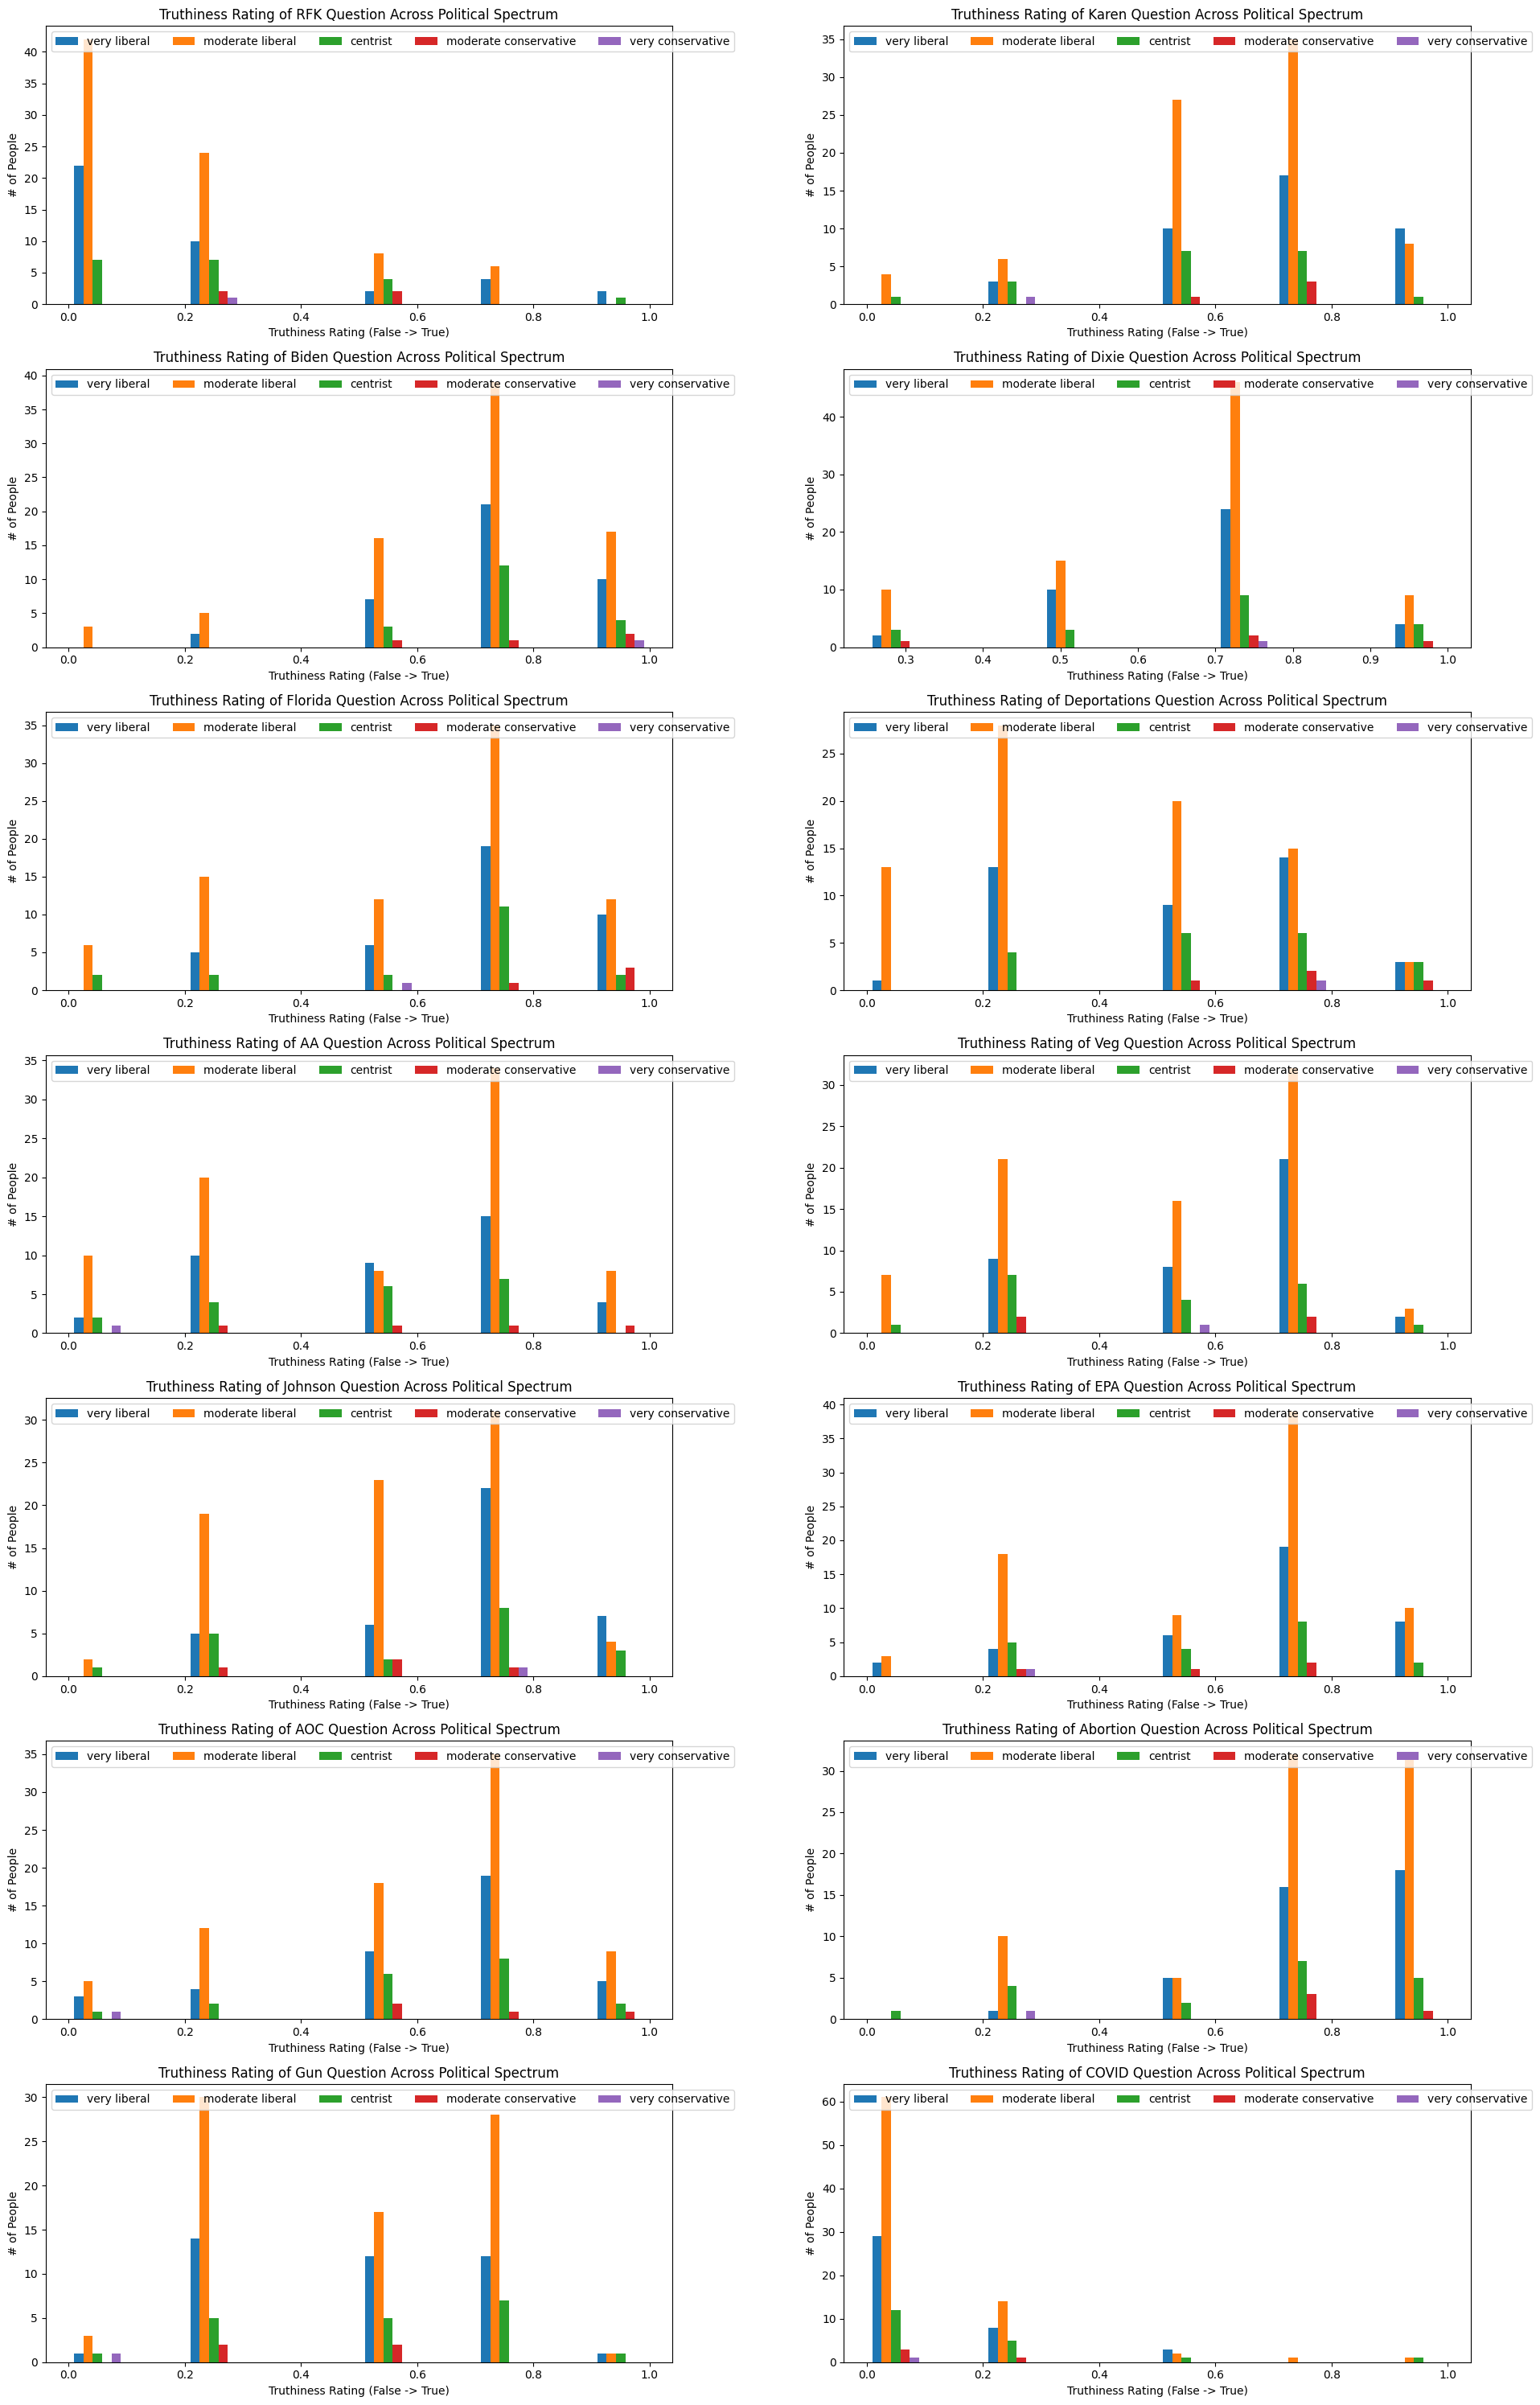

In [680]:
leanings = list(prior_map.keys())

ratings = {}

for p_idx, prior in enumerate(prior_map.values()):
    for q_idx in questions.keys():
        if q_idx not in ratings:
            ratings[q_idx] = {}
        ratings[q_idx][prior] = list(val for val in df[df['prior']==prior][q_idx] if val >= 0)

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(20, 30))
idx = 0
for q_idx in questions.keys():
    question = q_idx # Edit this line to show different questions
    x = idx % 7
    y = idx // 7
    ax[x][y].hist(ratings[question].values(), 
            histtype='bar', 
            label=list(prior_map.keys()))
    ax[x][y].set_title(f"Truthiness Rating of {question} Question Across Political Spectrum")
    ax[x][y].set_xlabel("Truthiness Rating (False -> True)")
    ax[x][y].set_ylabel("# of People")
    ax[x][y].legend(loc='upper left', ncols=5)
    idx += 1
fig.tight_layout()

In [681]:
print(df.describe())

            prior      number         RFK       Karen       Biden       Dixie  \
count  144.000000  144.000000  144.000000  144.000000  144.000000  144.000000   
mean     0.286111    1.618056    0.204861    0.633681    0.722222    0.677083   
std      0.152651    0.487559    0.255452    0.238206    0.223433    0.206695   
min      0.100000    1.000000    0.000000    0.000000    0.000000    0.250000   
25%      0.100000    1.000000    0.000000    0.500000    0.500000    0.500000   
50%      0.300000    2.000000    0.250000    0.750000    0.750000    0.750000   
75%      0.300000    2.000000    0.250000    0.750000    0.750000    0.750000   
max      0.900000    2.000000    1.000000    1.000000    1.000000    1.000000   

          Florida  Deportations          AA         Veg     Johnson  \
count  144.000000    143.000000  144.000000  143.000000  143.000000   
mean     0.642361      0.473776    0.531250    0.531469    0.596154   
std      0.281499      0.279451    0.296947    0.260124  

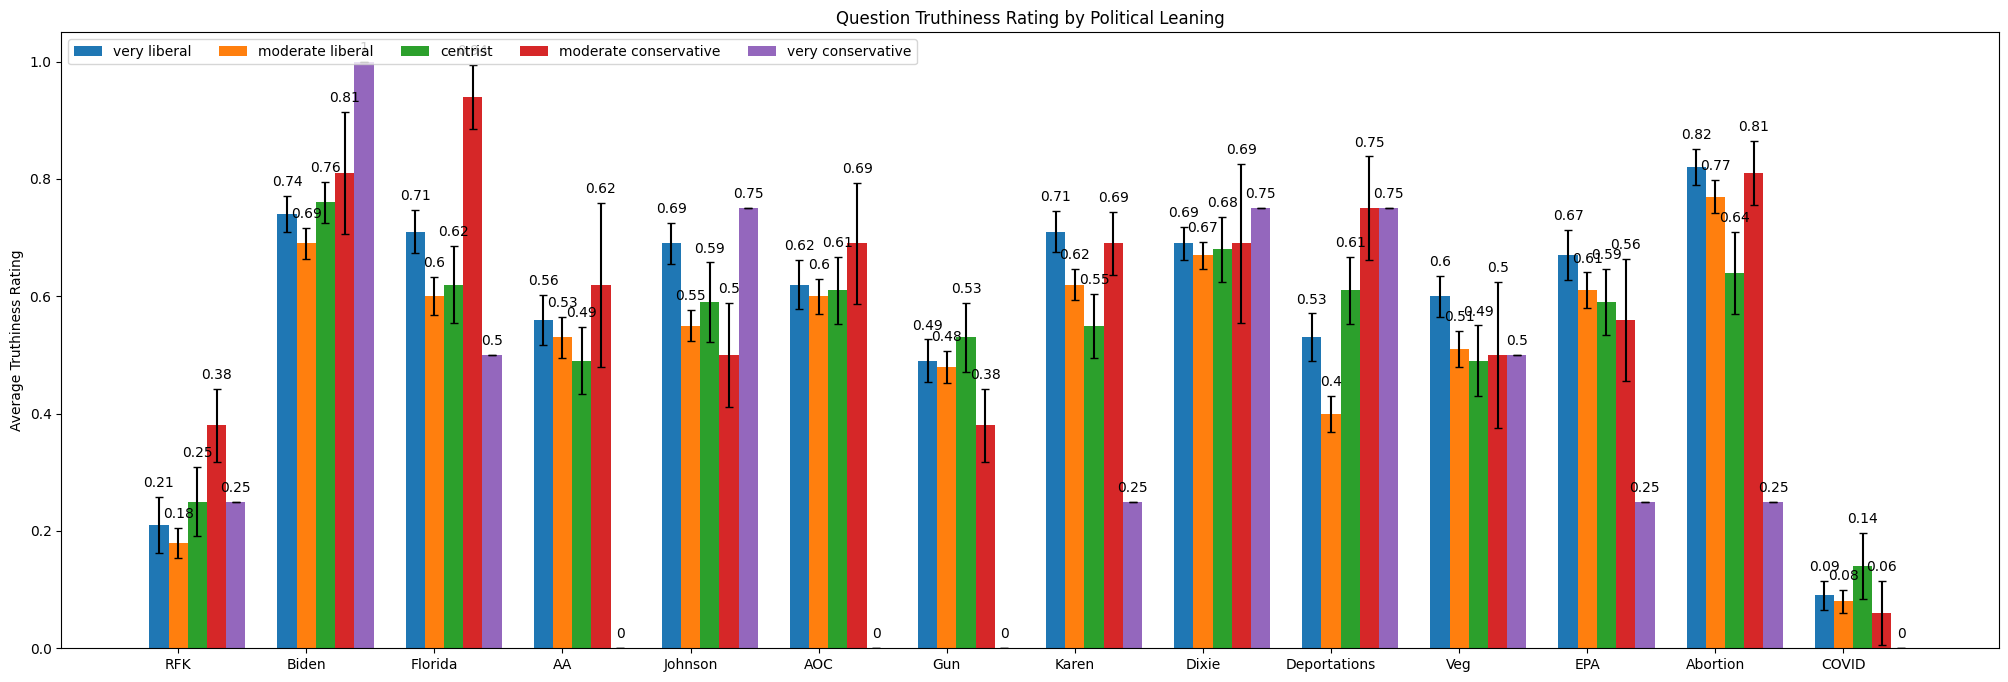

In [682]:
df_conservative = df[df['number']==1]
df_liberal = df[df['number']==2]

leanings = list(prior_map.keys())

ratings_cons = {}
ratings_lib = {}

for p_idx, prior in enumerate(prior_map.values()):
    for q_idx in questions.keys():
        if q_idx not in ratings_cons:
            ratings_cons[q_idx] = {}
        ratings_cons[q_idx][prior] = list(df_conservative[df_conservative['prior']==prior][q_idx])
        if q_idx not in ratings_lib:
            ratings_lib[q_idx] = {}
        ratings_lib[q_idx][prior] = list(df_liberal[df_liberal['prior']==prior][q_idx])

# print("Aggregated Bias")
# print("Average Conservativeness: ", np.mean(df['prior']))
mean_vals = []
err_vals = []
for q_idx in questions.keys():
    all_vals = list(itertools.chain.from_iterable(list(ratings[q_idx].values())))
    all_vals = [val for val in all_vals if val >= 0]
    mean_vals.append([round(np.mean([val for val in vals if val >= 0]),2) for vals in ratings[q_idx].values()])
    err_vals.append([np.std([val for val in vals if val >= 0])/np.sqrt(len(vals)) for vals in ratings[q_idx].values()])
    
    # print(q_idx, np.mean(all_vals))

q = len(questions.keys())
x = np.arange(q)  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for i in range(len(prior_map.keys())):
    offset = width * multiplier
    rects = ax.bar(x + offset, 
                   [mean_vals[j][i] for j in range(q)], 
                   width, 
                   label=list(prior_map.keys())[i], 
                   yerr=[err_vals[j][i] for j in range(q)],
                   capsize=3)
    ax.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Truthiness Rating')
ax.set_title('Question Truthiness Rating by Political Leaning')
ax.set_xticks(x + width, list(questions.keys()))
ax.legend(loc='upper left', ncols=5)
ax.yaxis

fig.set_figheight(8)
fig.set_figwidth(25)

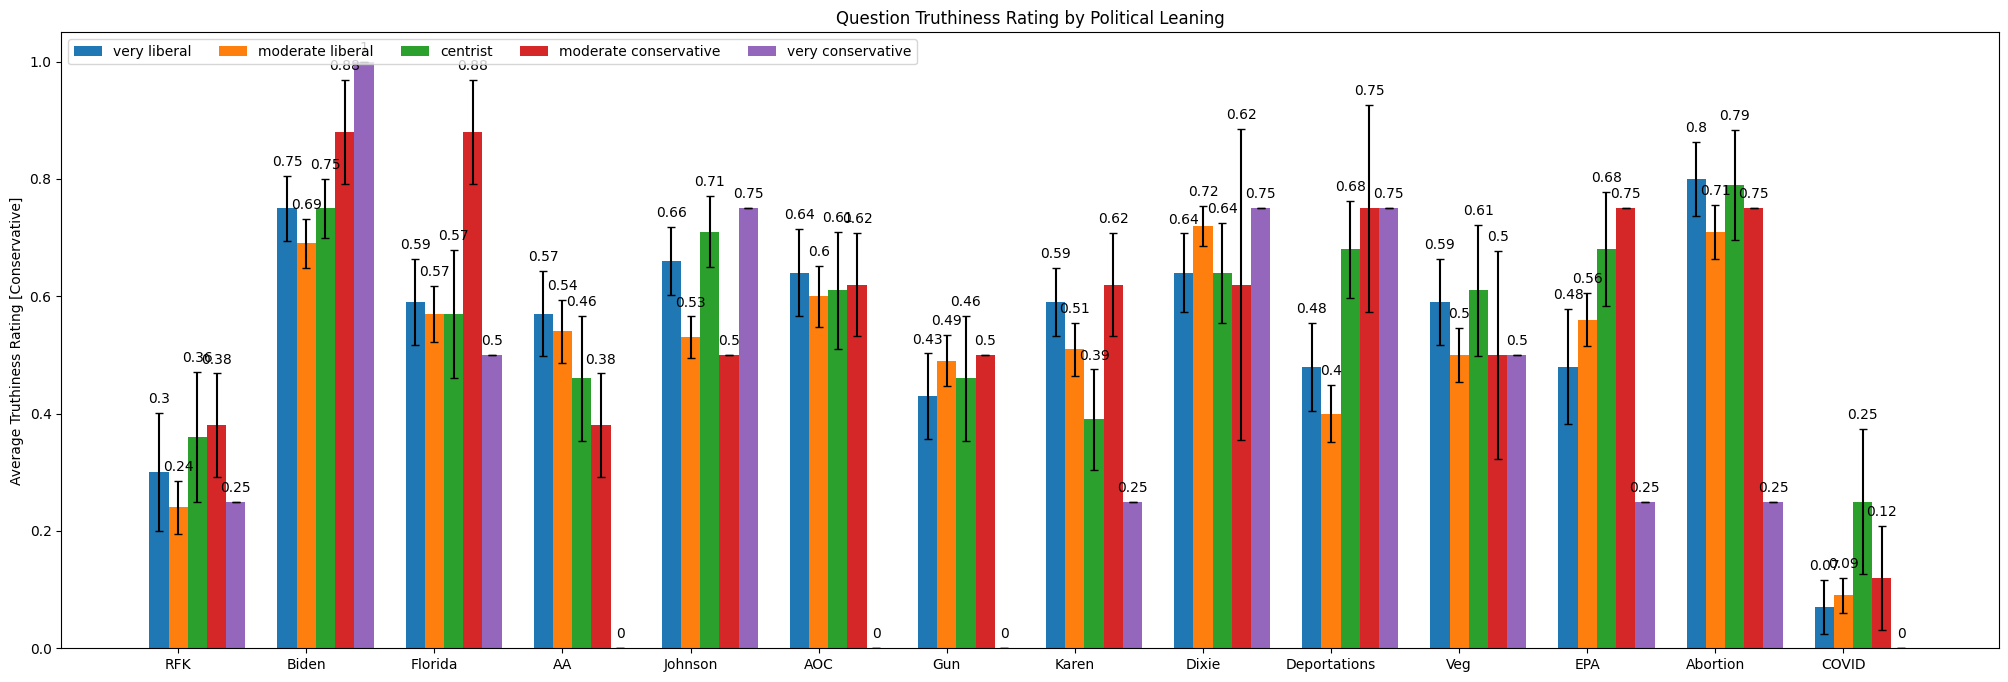

In [683]:
# print("Aggregated Bias")
# print("Average Conservativeness: ", np.mean(df['prior']))
mean_vals = []
err_vals = []
for q_idx in questions.keys():
    all_vals = list(itertools.chain.from_iterable(list(ratings_cons[q_idx].values())))
    all_vals = [val for val in all_vals if val >= 0]
    mean_vals.append([round(np.mean([val for val in vals if val >= 0]),2) for vals in ratings_cons[q_idx].values()])
    err_vals.append([np.std([val for val in vals if val >= 0])/np.sqrt(len(vals)) for vals in ratings_cons[q_idx].values()])
    
    # print(q_idx, np.mean(all_vals))

q = len(questions.keys())
x = np.arange(q)  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for i in range(len(prior_map.keys())):
    offset = width * multiplier
    rects = ax.bar(x + offset, 
                   [mean_vals[j][i] for j in range(q)], 
                   width, 
                   label=list(prior_map.keys())[i], 
                   yerr=[err_vals[j][i] for j in range(q)],
                   capsize=3)
    ax.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Truthiness Rating [Conservative]')
ax.set_title('Question Truthiness Rating by Political Leaning')
ax.set_xticks(x + width, list(questions.keys()))
ax.legend(loc='upper left', ncols=5)
ax.yaxis

fig.set_figheight(8)
fig.set_figwidth(25)

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


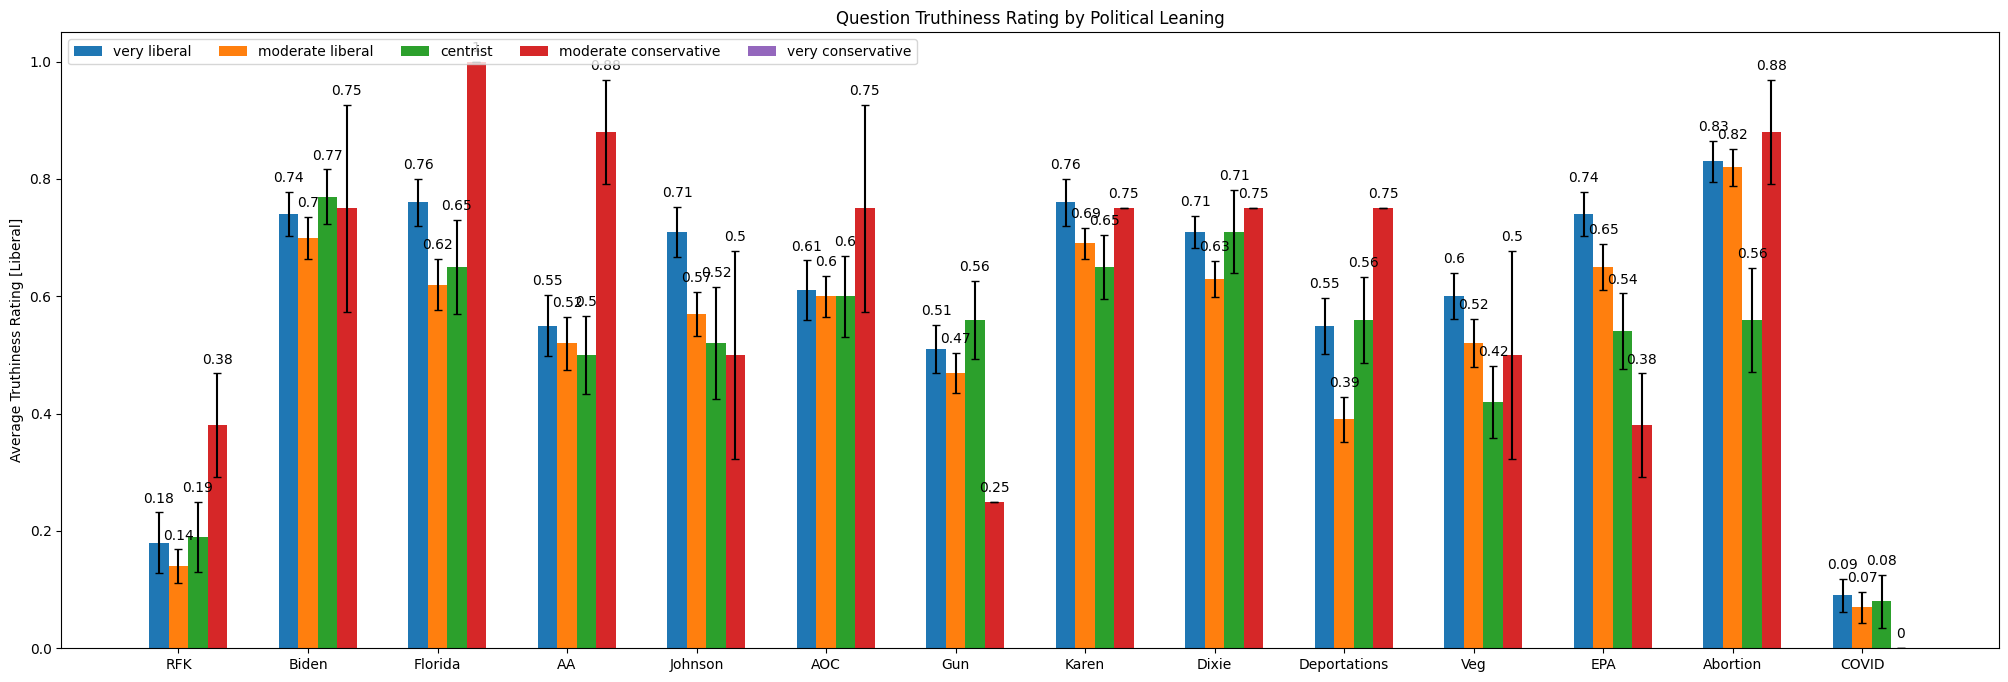

In [684]:
# print("Aggregated Bias")
# print("Average Conservativeness: ", np.mean(df['prior']))
mean_vals = []
err_vals = []
for q_idx in questions.keys():
    all_vals = list(itertools.chain.from_iterable(list(ratings_lib[q_idx].values())))
    all_vals = [val for val in all_vals if val >= 0]
    mean_vals.append([round(np.mean([val for val in vals if val >= 0]),2) for vals in ratings_lib[q_idx].values()])
    err_vals.append([np.std([val for val in vals if val >= 0])/np.sqrt(len(vals)) for vals in ratings_lib[q_idx].values()])
    
    # print(q_idx, np.mean(all_vals))

q = len(questions.keys())
x = np.arange(q)  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for i in range(len(prior_map.keys())):
    offset = width * multiplier
    rects = ax.bar(x + offset, 
                   [mean_vals[j][i] for j in range(q)], 
                   width, 
                   label=list(prior_map.keys())[i], 
                   yerr=[err_vals[j][i] for j in range(q)],
                   capsize=3)
    ax.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Truthiness Rating [Liberal]')
ax.set_title('Question Truthiness Rating by Political Leaning')
ax.set_xticks(x + width, list(questions.keys()))
ax.legend(loc='upper left', ncols=5)
ax.yaxis

fig.set_figheight(8)
fig.set_figwidth(25)

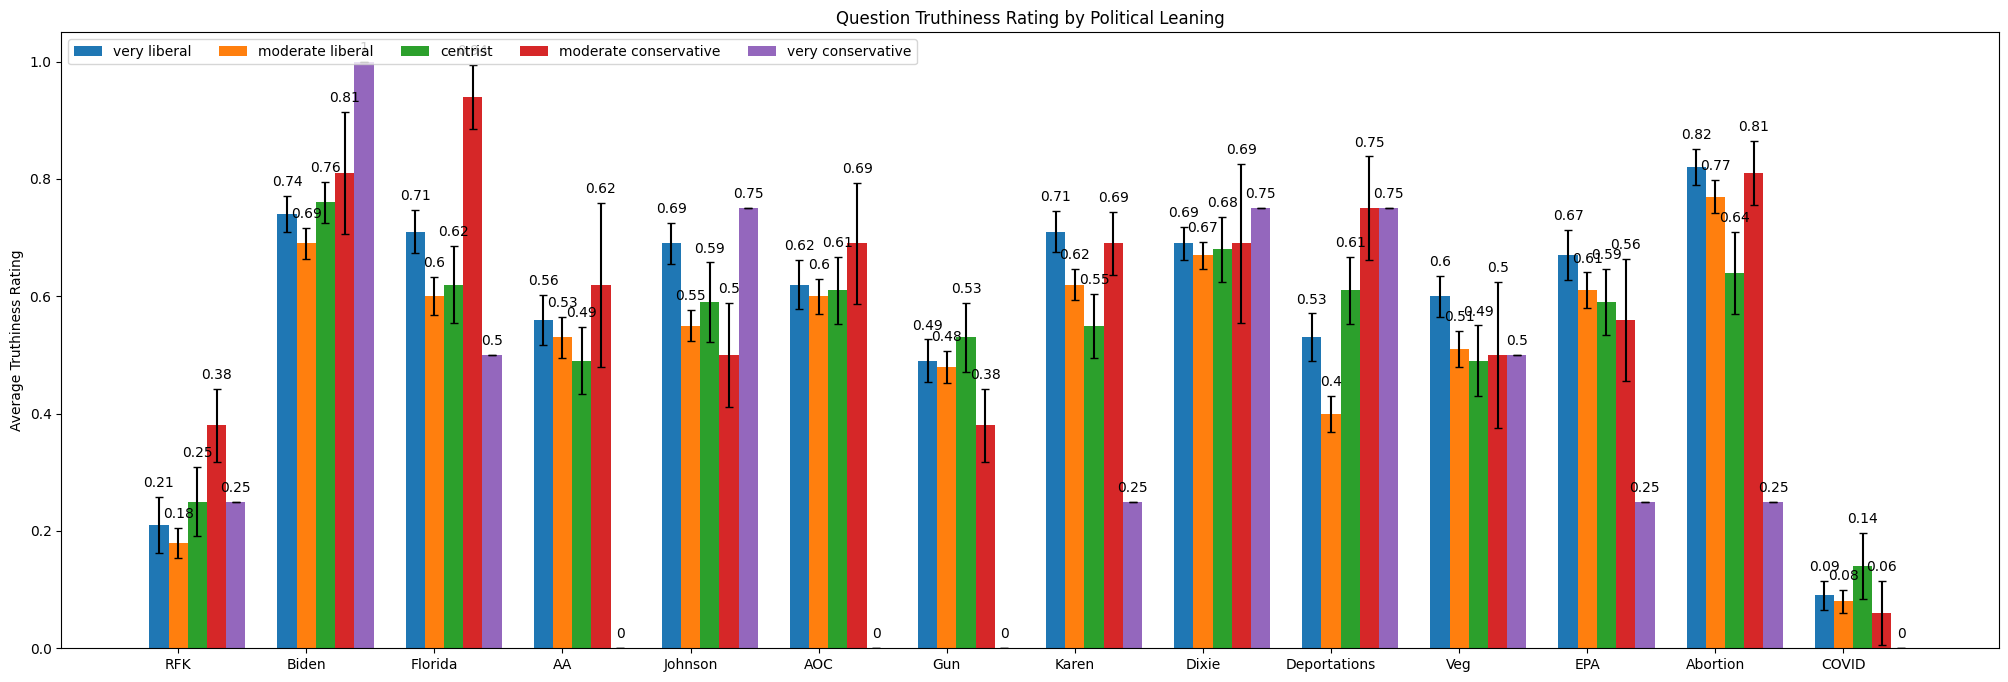

In [685]:
df_conservative = df[df['number']==1]
df_liberal = df[df['number']==2]

# print("Aggregated Bias")
# print("Average Conservativeness: ", np.mean(df['prior']))
mean_vals = []
err_vals = []
for q_idx in questions.keys():
    all_vals = list(itertools.chain.from_iterable(list(ratings[q_idx].values())))
    all_vals = [val for val in all_vals if val >= 0]
    mean_vals.append([round(np.mean([val for val in vals if val >= 0]),2) for vals in ratings[q_idx].values()])
    err_vals.append([np.std([val for val in vals if val >= 0])/np.sqrt(len(vals)) for vals in ratings[q_idx].values()])
    
    # print(q_idx, np.mean(all_vals))

q = len(questions.keys())
x = np.arange(q)  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for i in range(len(prior_map.keys())):
    offset = width * multiplier
    rects = ax.bar(x + offset, 
                   [mean_vals[j][i] for j in range(q)], 
                   width, 
                   label=list(prior_map.keys())[i], 
                   yerr=[err_vals[j][i] for j in range(q)],
                   capsize=3)
    ax.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Truthiness Rating')
ax.set_title('Question Truthiness Rating by Political Leaning')
ax.set_xticks(x + width, list(questions.keys()))
ax.legend(loc='upper left', ncols=5)
ax.yaxis

fig.set_figheight(8)
fig.set_figwidth(25)

# Definitions
## Data inputs
$l=$ liberalness (score from 0 to 1 indicating how liberal an individual is) <br> 
$t=$ truthiness rating (score from 0 to 1 indicating how much an individual believed a claim) <br> 

## Evaluation metrics
$C=$ politicalness <br> 
$B=$ believability <br> 

### Politicalness
The politicalness of a claim is a combination of how liberal it is and how politically divisive it is:

The degree to which a claim is liberal indicates how well-correlated an individual's liberalness is to their truthiness rating. This metric ranges from -1 to 1, where 0 indicates that people from all political backgrounds are equally likely to believe the claim, -1 indicates that a liberal leaning is anticorrelated with their truthiness rating, and 1 indicates that a liberal leaning is directly correlated with their truthiness rating.

If there is a strong linear correlation between $l$ stance and $r$, that indicates that the claim is more liberal. For simplicity, we represent this as the correlation coefficient between $l$ and $r$, weighted by how statistically significant the correlation is.

How politically divisive it is refers to the degree to which truthiness ratings vary within and between different political categories.

Higher variation within political categories and across political categories indicates that a claim is less political, since political leaning does not dictate the truthiness perception. For simplicity, we represent this as the f-value of the truthiness distributions across each political category.

### Believability
The believability of a claim indicates the bias that the nature of the claim places on how people rate its truthiness. It attempts to account for the degree to which individual's understand the context behind different claims and the inherit believability of the claim. This metric ranges from -1 to 1 where 0 indicates that the claim is impossible to decipher as true or false--people have very little context on it or have no priors on its validity. -1 indicates that the claim is highly absurd--people are highly likely to refer to it as false, and 1 indicates the opposite--people are likely to refer to it as true.

When the believability is 0, an individual's assessment of a claim's truthiness is only influenced by how political it is. Higher or lower believability values add a bias to the truthiness distributions. When the politicality of a claim is 0, an individual's assessment should only be influenced by how believable it is.

$$t = (0.5-C)\times l+B$$ 

## Examples
A normal distribution indicates that the truthiness ratings of all partipants fall o na normal curve. A political distribution indicates that the truthiness ratings are directly correlated to political leanings.

$p=0$, $b=0$ $\rightarrow$ Normal distribution centered at 0.5 \
$p=1$, $b=0$ $\rightarrow$ Political distribution where $l\sim t$ \
$p=1$, $b=1$ $\rightarrow$ Right-skewed political distribution where $l\sim t$ \
$p=0$, $b=1$ $\rightarrow$ Right-skewed normal distribution  

Average liberalness:  0.26956521739130435
[0.03962628865979345, -0.01610824442621733, -0.30605669998349844, -0.1630154632577204, -0.35352551409950267, -0.04869497467861324, 0.06914685412040336, -0.41800902297660053, -0.026739690721649858, -0.0009738905134815264, -0.319439034598416, -0.2252849106530172, -0.391507592561512, 0.10323338363080561]


,L,B,overall t_avg,avg l,track 1 t_avg,track 1 avg l,track 2 t_avg,track 2 avg l
RFK,0.039626,-0.311050,0.204861,0.401536,0.268182,1.000000,0.165730,0.000000
Biden,-0.016108,0.221972,0.722222,0.000000,0.722727,0.000000,0.721910,0.003820
Florida,-0.306057,0.217461,0.642361,0.245380,0.586364,0.428344,0.676966,0.132312
AA,-0.163015,0.076353,0.531250,0.276680,0.522727,0.328962,0.536517,0.244371
Johnson,-0.353526,0.193124,0.596154,0.274295,0.581818,0.314846,0.605114,0.248951
AOC,-0.048695,0.118199,0.603147,0.309110,0.595455,0.467079,0.607955,0.210379
Gun,0.069147,-0.029509,0.482517,0.173929,0.468182,0.000000,0.491477,0.303505
Karen,-0.418009,0.247664,0.633681,0.272683,0.513636,0.559863,0.707865,0.095211
Dixie,-0.026740,0.183473,0.677083,0.238956,0.690909,0.000000,0.668539,0.558481
Deportations,-0.000974,-0.035969,0.473776,0.000000,0.472222,0.000000,0.474719,0.000000


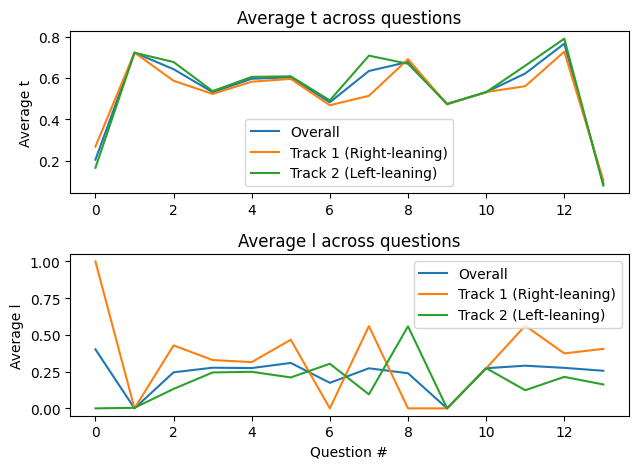

In [706]:
# Metric calculations

def rating_func(l, L, B):
    return 0.5+ L*l + B

metrics = {}
combined_leaning = []
for q_idx in questions.keys():
    metrics[q_idx] = {}
    dists = ratings[q_idx][0.1],ratings[q_idx][0.3], ratings[q_idx][0.5]
    fvalue, pvalue = stats.f_oneway(*dists)
    # metrics[q_idx]['f-value'] = fvalue
    # metrics[q_idx]['p-value [f]'] = pvalue
    # metrics[q_idx]['avg variance'] = np.mean([stats.sem(dist) for dist in dists])
    combined_dist = dists[0]+dists[1]+dists[2]
    combined_leaning = [0.1]*len(dists[0]) + [0.3]*len(dists[1]) + [0.5]*len(dists[2])
    guess = [0, 0]
    (L, B), cov = curve_fit(rating_func, combined_leaning, combined_dist, p0=guess)
    
    # metrics[q_idx]['corr'], metrics[q_idx]['p-value [corr]'] = stats.pearsonr(combined_leaning, combined_dist)
    metrics[q_idx]['L'] = L
    metrics[q_idx]['B'] = B
    
    all_vals = list(itertools.chain.from_iterable(list(ratings[q_idx].values())))
    all_vals = [val for val in all_vals if val >= 0]
    avg = np.mean(all_vals)
    metrics[q_idx]['overall t_avg'] = avg
    l = (avg-0.5-B)/L 
    l = max(l, 0)
    l = min(l, 1)
    metrics[q_idx]['avg l'] = l

    all_vals = list(itertools.chain.from_iterable(list(ratings_cons[q_idx].values())))
    all_vals = [val for val in all_vals if val >= 0]
    metrics[q_idx]['track 1 t_avg'] = np.mean(all_vals)
    l = (np.mean(all_vals)-0.5-B)/L 
    l = max(l, 0)
    l = min(l, 1)
    metrics[q_idx]['track 1 avg l'] = l

    all_vals = list(itertools.chain.from_iterable(list(ratings_lib[q_idx].values())))
    all_vals = [val for val in all_vals if val >= 0]
    metrics[q_idx]['track 2 t_avg'] = np.mean(all_vals)
    l = (np.mean(all_vals)-0.5-B)/L 
    l = max(l, 0)
    l = min(l, 1)
    metrics[q_idx]['track 2 avg l'] = l
    
    # metrics[q_idx]['mean'] = np.mean(combined_dist)
    # metrics[q_idx]['mean_0.1'] = np.mean(dists[0])
    # metrics[q_idx]['mean_0.3'] = np.mean(dists[1])
    # metrics[q_idx]['mean_0.5'] = np.mean(dists[2])
    # metrics[q_idx]['believability'] = fvalue

df_metrics = df.from_dict(metrics, orient='index')
print("Average liberalness: ", np.mean(combined_leaning))
print(list(df_metrics['L']))
df_metrics

fig, (ax,ax1) = plt.subplots(nrows=2)
ax.plot([metrics[q_idx]['overall t_avg'] for q_idx in questions.keys()], label='Overall')
ax.plot([metrics[q_idx]['track 1 t_avg'] for q_idx in questions.keys()], label='Track 1 (Right-leaning)')
ax.plot([metrics[q_idx]['track 2 t_avg'] for q_idx in questions.keys()], label='Track 2 (Left-leaning)')
ax.legend()
ax.set_title("Average t across questions")
ax.set_xticks = (np.arange(14), questions.keys())
ax.set_ylabel("Average t")

ax1.plot([metrics[q_idx]['avg l'] for q_idx in questions.keys()], label='Overall')
ax1.plot([metrics[q_idx]['track 1 avg l'] for q_idx in questions.keys()], label='Track 1 (Right-leaning)')
ax1.plot([metrics[q_idx]['track 2 avg l'] for q_idx in questions.keys()], label='Track 2 (Left-leaning)')
ax1.legend()
ax1.set_title("Average l across questions")
ax1.set_xticks = (np.arange(14), questions.keys())
ax1.set_xlabel("Question #")
ax1.set_ylabel("Average l")

fig.tight_layout()
df_metrics


[0.2048611111111111, 0.7222222222222222, 0.6423611111111112, 0.53125, 0.5961538461538461, 0.6031468531468531, 0.4825174825174825, 0.6336805555555556, 0.6770833333333334, 0.4737762237762238, 0.5314685314685315, 0.6214788732394366, 0.7657342657342657, 0.08916083916083917]
[0.2681818181818182, 0.7227272727272728, 0.5863636363636363, 0.5227272727272727, 0.5818181818181818, 0.5954545454545455, 0.4681818181818182, 0.5136363636363637, 0.6909090909090909, 0.4722222222222222, 0.5318181818181819, 0.5601851851851852, 0.7272727272727273, 0.10454545454545454]
[0.16573033707865167, 0.7219101123595506, 0.6769662921348315, 0.5365168539325843, 0.6051136363636364, 0.6079545454545454, 0.4914772727272727, 0.7078651685393258, 0.6685393258426966, 0.4747191011235955, 0.53125, 0.6590909090909091, 0.7897727272727273, 0.07954545454545454]


Text(0, 0.5, 'Political leaning prediction')

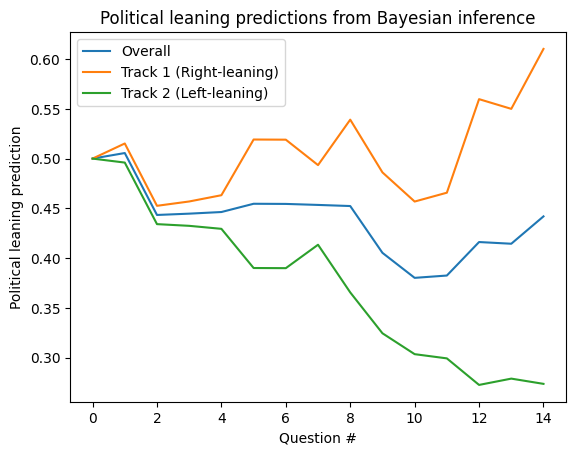

In [728]:
track_1 = [
    0.5,
    0.5151851851851852,
    0.4525446329409253,
    0.4568963624583008,
    0.46318568539086763,
    0.5191788581510773,
    0.5190168753809407,
    0.49345796044333806,
    0.5391358453254783,
    0.48613162513599756,
    0.45682791409205314,
    0.46571674330275087,
    0.5597515954558991,
    0.550002686214482,
    0.6102507502976091
]

track_2 = [0.5,
    0.4959934853420196,
    0.43411698352282824,
    0.4324084901903733,
    0.4293963790757244,
    0.3900079529833879,
    0.38986016658298017,
    0.4133950695366163,
    0.3654837892789538,
    0.3243973316401258,
    0.3034019964864994,
    0.29916425611603703,
    0.2724831687178338,
    0.27881856647687975,
    0.27355225024159924
]

print([metrics[q_idx]['overall t_avg'] for q_idx in questions.keys()])
print([metrics[q_idx]['track 1 t_avg'] for q_idx in questions.keys()])
print([metrics[q_idx]['track 2 t_avg'] for q_idx in questions.keys()])


plt.plot([np.mean([track_1[i], track_2[i]]) for i in range(15)], label='Overall')
plt.plot(track_1, label='Track 1 (Right-leaning)')
plt.plot(track_2, label='Track 2 (Left-leaning)')
plt.legend()
plt.title("Political leaning predictions from Bayesian inference")
plt.xlabel('Question #')
plt.ylabel('Political leaning prediction')


Text(0, 0.5, 'Political leaning prediction')

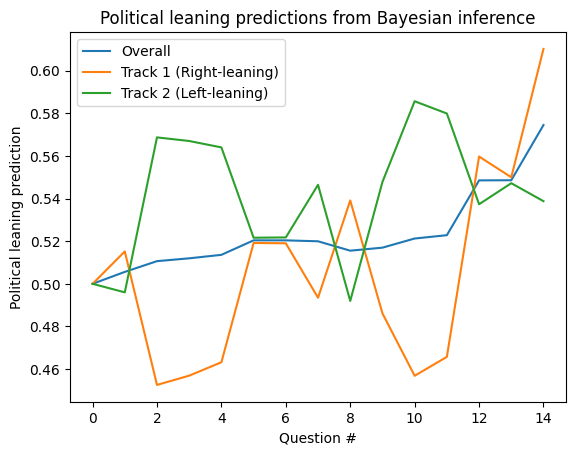

In [731]:
track_1 = [ 0.5,
    0.5151851851851852,
    0.4525446329409253,
    0.4568963624583008,
    0.46318568539086763,
    0.5191788581510773,
    0.5190168753809407,
    0.49345796044333806,
    0.5391358453254783,
    0.48613162513599756,
    0.45682791409205314,
    0.46571674330275087,
    0.5597515954558991,
    0.550002686214482,
    0.6102507502976091
]
track_2 = [ 0.5,
    0.4959934853420196,
    0.5687290194937952,
    0.5670325196186338,
    0.5640230894417709,
    0.5216350048927911,
    0.5217748940316707,
    0.5464675330874107,
    0.491964734181011,
    0.5478114652726673,
    0.5856972588742523,
    0.5799338853773287,
    0.537341530592487,
    0.547226246002243,
    0.5387828178145742
]

plt.plot([np.mean([track_1[i], track_2[i]]) for i in range(15)], label='Overall')
plt.plot(track_1, label='Track 1 (Right-leaning)')
plt.plot(track_2, label='Track 2 (Left-leaning)')
plt.legend()
plt.title("Political leaning predictions from Bayesian inference")
plt.xlabel('Question #')
plt.ylabel('Political leaning prediction')

In [687]:
df_conservative
print(np.mean(df_conservative['prior']))
print(np.mean(df_conservative['prior']==0.1['RFK']))

0.3109090909090909


<>:3: SyntaxWarning: 'float' object is not subscriptable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'float' object is not subscriptable; perhaps you missed a comma?
/var/folders/gd/s0v86kzd77x3shl7x66ftf5m0000gp/T/ipykernel_70625/744422265.py:3: SyntaxWarning: 'float' object is not subscriptable; perhaps you missed a comma?
  print(np.mean(df_conservative['prior']==0.1['RFK']))


TypeError: 'float' object is not subscriptable

In [ ]:
df_liberal
print(np.mean(df_liberal['prior']))

0.27078651685393257


In [ ]:
ratings_cons

{'RFK': {0.1: [0.0, 0.0, 0.5, 0.5, 1.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.75],
  0.3: [0.0,
   0.5,
   0.25,
   0.25,
   0.0,
   0.0,
   0.75,
   0.5,
   0.0,
   0.0,
   0.0,
   0.25,
   0.25,
   0.0,
   0.75,
   0.0,
   0.5,
   0.5,
   0.0,
   0.5,
   0.25,
   0.25,
   0.0,
   0.0,
   0.0,
   0.75,
   0.25,
   0.0,
   0.0,
   0.0,
   0.25,
   0.5,
   0.0,
   0.75],
  0.5: [0.25, 0.25, 0.25, 0.5, 0.0, 1.0, 0.25],
  0.7: [0.5, 0.25],
  0.9: [0.25]},
 'Karen': {0.1: [0.75, 0.5, 0.5, 1.0, 0.25, 0.5, 0.75, 0.5, 0.75, 0.5, 0.5],
  0.3: [1.0,
   0.5,
   0.25,
   0.5,
   0.5,
   0.5,
   0.5,
   1.0,
   0.5,
   0.75,
   0.0,
   0.75,
   0.25,
   0.0,
   0.25,
   0.75,
   0.25,
   0.5,
   0.75,
   0.25,
   0.5,
   1.0,
   0.75,
   0.5,
   0.5,
   0.5,
   0.75,
   0.75,
   0.5,
   0.75,
   0.25,
   0.0,
   0.5,
   0.5],
  0.5: [0.5, 0.25, 0.75, 0.25, 0.5, 0.0, 0.5],
  0.7: [0.75, 0.5],
  0.9: [0.25]},
 'Biden': {0.1: [0.75, 1.0, 0.5, 0.5, 1.0, 0.75, 0.75, 0.75, 1.0, 0.5, 0.75],
  0.3: [0.0,
   0.5,
 

In [ ]:
df_liberal

,prior,number,RFK,Karen,Biden,Dixie,Florida,Deportations,AA,Veg,Johnson,EPA,AOC,Abortion,Gun,COVID
3,0.5,2,0.25,0.50,0.50,1.00,0.75,0.50,0.50,0.50,0.25,0.25,1.00,0.25,0.50,0.00
4,0.1,2,0.25,0.75,0.75,1.00,1.00,0.75,0.50,0.25,0.75,0.50,0.75,1.00,0.75,0.25
6,0.3,2,0.00,1.00,0.00,0.75,1.00,0.25,0.75,0.25,0.25,1.00,0.50,1.00,0.50,0.00
7,0.1,2,0.00,1.00,0.75,0.75,0.75,0.75,0.75,0.75,1.00,1.00,0.50,1.00,0.50,0.00
8,0.5,2,0.00,0.75,0.75,0.75,0.75,0.75,0.50,0.25,0.75,0.50,0.50,0.25,0.75,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.3,2,0.00,0.75,1.00,1.00,0.50,0.75,0.75,0.00,0.75,1.00,0.25,1.00,0.25,0.00
137,0.3,2,0.00,0.75,0.75,0.75,1.00,0.25,0.25,0.25,0.00,0.75,0.75,1.00,0.25,0.00
138,0.3,2,0.00,0.75,0.50,0.25,0.75,0.25,0.75,0.75,0.25,0.25,0.75,1.00,0.25,0.00
140,0.5,2,0.00,0.75,0.75,0.75,1.00,0.50,0.50,0.25,0.75,0.75,0.75,0.50,0.75,0.00


# WebPPL Code
```
var Bs = [-0.3110502577319588, 0.24766430422242808, 0.2219716486558898, 0.18347293814433008, 0.21746133953017863, -0.03596935705130893, 0.07635309265887524, 0.11871834805001982, 0.19312426856789297, 0.1869202204286739, 0.11819893520322045, 0.3736527714192171, -0.02950915255439063, -0.43724841935555003]
var Ls = [0.03962628865979345, -0.41800902297660053, -0.01610824442621733, -0.026739690721649858, -0.30605669998349844, -0.0009738905134815264, -0.1630154632577204, -0.319439034598416, -0.35352551409950267, -0.2252849106530172, -0.04869497467861324, -0.391507592561512, 0.06914685412040336, 0.10323338363080561]
var overall = [0.2048611111111111, 0.7222222222222222, 0.6423611111111112, 0.53125, 0.5961538461538461, 0.6031468531468531, 0.4825174825174825, 0.6336805555555556, 0.6770833333333334, 0.4737762237762238, 0.5314685314685315, 0.6214788732394366, 0.7657342657342657, 0.08916083916083917]
var track_1 = [0.2681818181818182, 0.7227272727272728, 0.5863636363636363, 0.5227272727272727, 0.5818181818181818, 0.5954545454545455, 0.4681818181818182, 0.5136363636363637, 0.6909090909090909, 0.4722222222222222, 0.5318181818181819, 0.5601851851851852, 0.7272727272727273, 0.10454545454545454]
var track_2 = [0.16573033707865167, 0.7219101123595506, 0.6769662921348315, 0.5365168539325843, 0.6051136363636364, 0.6079545454545454, 0.4914772727272727, 0.7078651685393258, 0.6685393258426966, 0.4747191011235955, 0.53125, 0.6590909090909091, 0.7897727272727273, 0.07954545454545454]

var makeModel = function(f){return function(){
  
  var B = mem(function(q_idx){Bs[q_idx]});
  var L = mem(function(p_idx){Ls[p_idx]});
  
  var pol_leaning = mem(function(subject){uniformDraw([0.1,0.3,0.5,0.7,0.9])});

  var t_rating =  mem(function(subject, q_idx) {
    var prob = 0.5 + pol_leaning(subject)*L(q_idx)+B(q_idx);
    if(prob > 1) {
      flip(1);
    } else {
      if(prob < 0) {
        flip(0);
      } else {
        flip(prob);
      }    
    }
//     flip(overall[q_idx])
  });  
  f(B, L, pol_leaning, t_rating)
}}

editor.put("makeModel", makeModel)
var makeModel = editor.get("makeModel")
var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(t_rating('1', 0) && t_rating('1', 1))
  return p('1')
}))
display(dist);
var vals = [0.1, 0.3, 0.5, 0.7, 0.9];
var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))];
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum);
viz.bar(vals, probs, {xLabel: 'Political Leaning', yLabel: 'P(Political Leaning | Q2: True and Q1: True)'});
print(dist);

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2) && !t_rating('1', 3) && !t_rating('1', 4) && t_rating('1', 5) && t_rating('1', 6) && !t_rating('1', 7) && t_rating('1', 8) && t_rating('1', 9) && !t_rating('1', 10) && !t_rating('1', 11) && !t_rating('1', 12) && t_rating('1', 13))
  return p('1')
}))
display(dist);
var vals = [0.1, 0.3, 0.5, 0.7, 0.9];
var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
viz.bar(vals, probs, {xLabel: 'Political Leaning', yLabel: 'P(Political Leaning | Track 1)'});
print(dist);

// Track 2

print("Track 2");

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1) && t_rating('2', 2))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1) && t_rating('2', 2) && t_rating('2', 3))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1) && t_rating('2', 2) && t_rating('2', 3) && t_rating('2', 4))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1) && t_rating('2', 2) && t_rating('2', 3) && t_rating('2', 4) && t_rating('2', 5))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1) && t_rating('2', 2) && t_rating('2', 3) && t_rating('2', 4) && t_rating('2', 5) && !t_rating('2', 6))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1) && t_rating('2', 2) && t_rating('2', 3) && t_rating('2', 4) && t_rating('2', 5) && !t_rating('2', 6) && t_rating('2', 7))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1) && t_rating('2', 2) && t_rating('2', 3) && t_rating('2', 4) && t_rating('2', 5) && !t_rating('2', 6) && t_rating('2', 7) && t_rating('2', 8))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1) && t_rating('2', 2) && t_rating('2', 3) && t_rating('2', 4) && t_rating('2', 5) && !t_rating('2', 6) && t_rating('2', 7) && t_rating('2', 8) && t_rating('2', 9))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1) && t_rating('2', 2) && t_rating('2', 3) && t_rating('2', 4) && t_rating('2', 5) && !t_rating('2', 6) && t_rating('2', 7) && t_rating('2', 8) && t_rating('2', 9) && t_rating('2', 10))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1) && t_rating('2', 2) && t_rating('2', 3) && t_rating('2', 4) && t_rating('2', 5) && !t_rating('2', 6) && t_rating('2', 7) && t_rating('2', 8) && t_rating('2', 9) && t_rating('2', 10) && t_rating('2', 11))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1) && t_rating('2', 2) && t_rating('2', 3) && t_rating('2', 4) && t_rating('2', 5) && !t_rating('2', 6) && t_rating('2', 7) && t_rating('2', 8) && t_rating('2', 9) && t_rating('2', 10) && t_rating('2', 11) && t_rating('2', 12))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)

var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
  condition(!t_rating('2', 0) && t_rating('2', 1) && t_rating('2', 2) && t_rating('2', 3) && t_rating('2', 4) && t_rating('2', 5) && !t_rating('2', 6) && t_rating('2', 7) && t_rating('2', 8) && t_rating('2', 9) && t_rating('2', 10) && t_rating('2', 11) && t_rating('2', 12) && !t_rating('2', 13))
  return p('2')
}))
var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
print(sum)
// var vals = [0.1, 0.3, 0.5, 0.7, 0.9];
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// viz.bar(vals, probs, {xLabel: 'Political Leaning', yLabel: 'P(Political Leaning | Track 2)'});
// print(dist);


// Track 1
// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2) && !t_rating('1', 3))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2) && !t_rating('1', 3) && !t_rating('1', 4))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2) && !t_rating('1', 3) && !t_rating('1', 4) && t_rating('1', 5))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2) && !t_rating('1', 3) && !t_rating('1', 4) && t_rating('1', 5) && t_rating('1', 6))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2) && !t_rating('1', 3) && !t_rating('1', 4) && t_rating('1', 5) && t_rating('1', 6) && !t_rating('1', 7))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2) && !t_rating('1', 3) && !t_rating('1', 4) && t_rating('1', 5) && t_rating('1', 6) && !t_rating('1', 7) && t_rating('1', 8))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2) && !t_rating('1', 3) && !t_rating('1', 4) && t_rating('1', 5) && t_rating('1', 6) && !t_rating('1', 7) && t_rating('1', 8) && t_rating('1', 9))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2) && !t_rating('1', 3) && !t_rating('1', 4) && t_rating('1', 5) && t_rating('1', 6) && !t_rating('1', 7) && t_rating('1', 8) && t_rating('1', 9) && !t_rating('1', 10))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2) && !t_rating('1', 3) && !t_rating('1', 4) && t_rating('1', 5) && t_rating('1', 6) && !t_rating('1', 7) && t_rating('1', 8) && t_rating('1', 9) && !t_rating('1', 10) && !t_rating('1', 11))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2) && !t_rating('1', 3) && !t_rating('1', 4) && t_rating('1', 5) && t_rating('1', 6) && !t_rating('1', 7) && t_rating('1', 8) && t_rating('1', 9) && !t_rating('1', 10) && !t_rating('1', 11) && !t_rating('1', 12))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)

// var dist = Infer({method:'enumerate'}, makeModel(function(B, L, p, t_rating) {
//   condition(t_rating('1', 0) && t_rating('1', 1) && !t_rating('1', 2) && !t_rating('1', 3) && !t_rating('1', 4) && t_rating('1', 5) && t_rating('1', 6) && !t_rating('1', 7) && t_rating('1', 8) && t_rating('1', 9) && !t_rating('1', 10) && !t_rating('1', 11) && !t_rating('1', 12) && t_rating('1', 13))
//   return p('1')
// }))
// var probs = [Math.exp(dist.score(0.1)), Math.exp(dist.score(0.3)), Math.exp(dist.score(0.5)), Math.exp(dist.score(0.7)), Math.exp(dist.score(0.9))]
// var sum = Math.sum([0.1*Math.exp(dist.score(0.1)), 0.3*Math.exp(dist.score(0.3)), 0.5*Math.exp(dist.score(0.5)), 0.7*Math.exp(dist.score(0.7)), 0.9*Math.exp(dist.score(0.9))]);
// print(sum)
```
